<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/2_3_Independent_Variables_and_Random_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, numpy as np, scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn import datasets

**2.3.1 Joint Probability Distributions** - The probability of two (or more) random variables is the join probability distribution.

2.3.1.1 Two Discrete Random Variables - The joint probability mass function (jpmf) for two discrete variables (x,γ) is defined as p(x,γ) = P(X=x and Y=γ), with p(x,γ) >= 0 and ∑ₓ∑ᵧp(x,γ)=1.

Each variable has it's own marginal probability where pₓ(x) = ∑p(x,γ) for each possible x value where y:p(x,γ) > 0 and pᵧ(γ) = ∑p(x,γ) for each possible y value where x:p(x,γ) > 0.

2.3.1.2 Two Continuous Random Variables - the jpmf for two continuous variables (x,γ) is defined as f(x,γ) where f(x,γ) >= 0 and ∫∫f(x,γ)dxdγ = 1 from -∞ to ∞. We can then find the probability for any two-dimensional set A with P[(X,Y)∈A] = ∫∫f(x,γ)dγdx, for a rectangle, A would be {(x,γ):a<=x<=b,c<=γ<=d}.

Each variable has it's own marginal probability where fₓ(x) = ∫f(x,γ) for each possible x value from -∞ to ∞ and fᵧ(γ) = ∫f(x,γ) for each possible γ value from -∞ to ∞.

2.3.1.3 Independent Random Variables - The independence of two events can be described by P(A∩B) = P(A)P(B) because the probability that their events happen together is the same as the probability of the two event happening individually. This can be extended to two random variables with p(x,γ) = pₓ(x)pᵧ(γ) for discrete variables or f(x,γ) = fₓ(x)fᵧ(γ) for continuous variables. If the respective formula is not satisfied for every (x,γ) then the variables are said to be dependent.

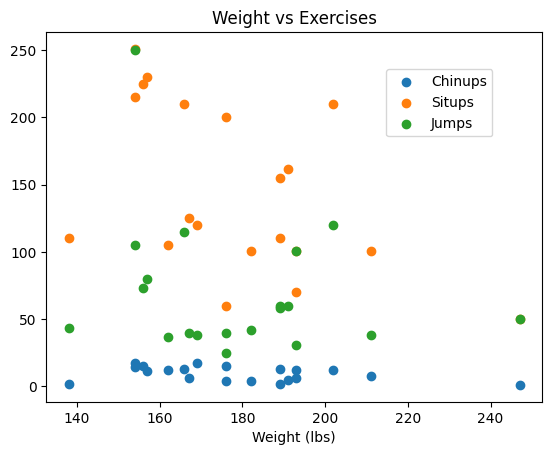

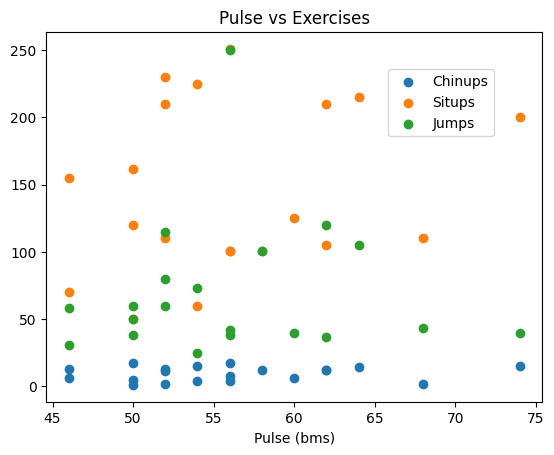

In [6]:
workout_data = datasets.load_linnerud(as_frame=True)

# Physical Data
physical_data: pd.DataFrame = workout_data.target
# Exercise Data
exercise_data: pd.DataFrame = workout_data.data

wt_fig, wt_ax = plt.subplots()
wt_ax.scatter(physical_data["Weight"], exercise_data["Chins"])
wt_ax.scatter(physical_data["Weight"], exercise_data["Situps"])
wt_ax.scatter(physical_data["Weight"], exercise_data["Jumps"])

wt_ax.set_title("Weight vs Exercises")
wt_ax.set_xlabel("Weight (lbs)")
wt_fig.legend(["Chinups", "Situps", "Jumps"], loc=(0.7, 0.7))
plt.show()

ps_fig, ps_ax = plt.subplots()
ps_ax.scatter(physical_data["Pulse"], exercise_data["Chins"])
ps_ax.scatter(physical_data["Pulse"], exercise_data["Situps"])
ps_ax.scatter(physical_data["Pulse"], exercise_data["Jumps"])

ps_ax.set_title("Pulse vs Exercises")
ps_ax.set_xlabel("Pulse (bms)")
ps_fig.legend(["Chinups", "Situps", "Jumps"], loc=(0.7, 0.7))
plt.show()

**2.3.2 Correlation and Dependence** - We can use correlations to predict the value of a dependent variable based on another dependent variable using their covariance, the joint variability of the two random variables.

2.3.2.1 Correlation for Random Variables - Given two random variables, X and Y, with a pmf p(x,γ) or pdf f(x,γ) for discrete or continuous respectively, we can find their covariance by: Cov(X,Y) = E[(X-μₓ)(Y-μᵧ)] = ∑ₓ∑ᵧ(x-μₓ)(γ-μᵧ)p(x,γ) for discrete and = ∫∫(x-μₓ)(γ-μᵧ)f(x,γ)dxdy for continuous. These can give us a positive, negative or near zero covariance.

The correlation coefficient, Corr(X,Y) = pₓᵧ = Cov(X,Y) / σₓσᵧ.

2.3.2.2 Correlation for Samples - We can find the correlation for samples by estimating the values for x and y, with x̄ = 1/n∑xᵢ from i=1 to n and ȳ. With rₓᵧ representing the sample correlation coefficient. rₓᵧ^2 = [∑(xᵢ-x̄)(yᵢ-ȳ)]^2 / ∑(xᵢ-x̄)^2 ∑(yᵢ-ȳ)^2 for i=1 to n. This will give us 5 possibilities, 0 < r < 1, -1 < r < 0, r = 0, r = 1, r = -1.

In [12]:
def cov(X, Y):
    n = len(X)
    x_mean = sum(X) / n
    y_mean = sum(Y) / n
    return sum([(x - x_mean) * (y - y_mean) for x, y in zip(X, Y)]) / (n-1)

def corr(X, Y):
    n = len(X)
    x_mean = sum(X) / n
    y_mean = sum(Y) / n
    return cov(X,Y) / (np.std(X) * np.std(Y))

cov_data = pd.DataFrame(index=physical_data.columns, columns=exercise_data.columns)
corr_data = pd.DataFrame(index=physical_data.columns, columns=exercise_data.columns)

for i in physical_data.columns:
    for j in exercise_data.columns:
        cov_data.loc[i, j] = cov(physical_data[i], exercise_data[j])

for i in physical_data.columns:
    for j in exercise_data.columns:
        corr_data.loc[i, j] = corr(physical_data[i], exercise_data[j])

print("Covariances")
print(cov_data)

print("\nCorrelations")
print(corr_data)

# From here on, we will just use pandas .cov() and .corr() to accomplish this

Covariances
            Chins      Situps       Jumps
Weight -50.863158 -761.715789 -286.505263
Waist   -9.347368 -129.336842  -31.442105
Pulse    5.742105  101.521053   12.915789

Correlations
           Chins    Situps     Jumps
Weight -0.410204 -0.519035 -0.238206
Waist  -0.581297 -0.679577 -0.201578
Pulse   0.158577  0.236882  0.036772


**2.3.3 Random Samples**

2.3.3.1 Random Samples - A simple random sample is a subset of a population randomly selected to represent the data. The variables that make up this random sample must be independent and have the same probability distribution. This has E(X̄) = μₓ = μ, V(X̄) = σₓ^2 = σ^2 / n and σₓ^2 = σ^2 / n where n is the sample size, μ is the mean, σ is the standard deviation. For the sample total, Tₒ, E(Tₒ) = nμ, V(Tₒ) = nσ^2 and σ^2 for Tₒ = nσ^2.

The Central Limit Theorem - If you properly normalize a sum of independent random variables, they will always tend towards a normal distribution even if they are not normally distributed themselves. This allows us to use methods used for normal distributions on problems with many other distributions.